In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from classifier import MLPBinary
import utils

In [8]:
utils.resize_data_test(20)

In [6]:
# resizing of the data created with monte carlo
T_CRIT = 2.2691853 # k_b * T_C / J  with k_b=1, J = interaction constant

lt, ut, t_step = 0.7, 3.2, 0.003

for L in [10, 15, 20]:
    utils.resize_data(L, lt, ut)

In [ ]:
def analysis(L, dim_hidden=30, lr=1e-4, tol=1e-5):

    lt, ut, t_step = 0.7, 3.2, 0.003
    n = int((ut-lt) / t_step) # number of datapoints

    data = np.load(f"data/{L}.npy")
    temps = np.load(f"data/{L}_temp.npy")

    # target value
    t = (temps > T_CRIT).astype(int)

    # DATA Shuffling
    rng = np.random.default_rng()
    indices = np.arange(data.shape[0])
    rng.shuffle(indices)

    data = data[indices]
    t = t[indices]
    temps = temps[indices]

    # splitting data in 60% training, 30% validation, 10% test
    a, b = int(0.7*n), int(0.9*n)
    data_train = data[:a]
    data_val = data[a:b]
    data_test = data[b:]

    t_train = t[:a]
    t_val = t[a:b]
    t_test = t[b:]

    # CLASSIFIER TRAINING
    #clf = MLPBinary(dim_hidden=dim_hidden, tolerance=tol)
    #clf.fit(data_train, t_train, X_val=data_val, t_val=t_val ,lr=lr)

    # using skleanr
    clf = MLPClassifier()
    clf.fit(data_train, t_train)

    # plotting accuracy and loss
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(9,3))
    E = len(clf.train_acc) 
    ax1.plot(np.arange(E), clf.train_acc)
    ax1.plot(np.arange(E), clf.val_acc)
    ax1.legend(["train_acc", "val_acc"])

    E = len(clf.loss) 
    ax1.plot(np.arange(E), clf.loss)
    ax1.plot(np.arange(E), clf.val_acc)
    ax1.legend(["train_acc", "val_acc"])

    ax2.plot(np.arange(E), clf.train_loss)
    ax2.plot(np.arange(E), clf.val_loss)
    ax2.set_ylabel("Loss"), ax2.set_xlabel("Accuracy")
    ax1.set_xlabel("Epochs"), ax2.set_xlabel("Epochs")
    ax2.legend(["train_loss", "val_loss"])

    return clf, data_test, t_test, temps


In [7]:
L=20
data = np.load(f"data/{L}.npy")
temps = np.load(f"data/{L}_temp.npy")
t = (temps < T_CRIT).astype(int)

TypeError: object of type 'NoneType' has no len()

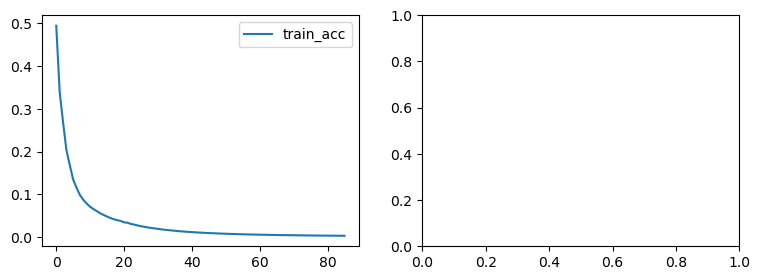

In [ ]:

lt, ut, t_step = 0.7, 3.2, 0.002
 # number of datapoints
T_CRIT = 2.2691853 # k_b * T_C / J  with k_b=1, J = interaction constant

data = np.load(f"data/{L}.npy")
temps = np.load(f"data/{L}_temp.npy")
n = data.shape[0]

# target value
t = (temps < T_CRIT).astype(int)

# DATA Shuffling
rng = np.random.default_rng()
indices = np.arange(data.shape[0])
rng.shuffle(indices)

data = data[indices]
t = t[indices]
temps = temps[indices]

# splitting data in 80% training, 20% validation, 10% test
a = int(0.8*n)
data_train = data[:a]
data_val = data[a:]


t_train = t[:a]
t_val = t[a:]
#temp_test = np.load(f"./data/{L}_temp.npy")

# CLASSIFIER TRAINING
#clf = MLPBinary(dim_hidden=dim_hidden, tolerance=tol)
#clf.fit(data_train, t_train, X_val=data_val, t_val=t_val ,lr=lr)

# using skleanr
clf = MLPClassifier()
clf.fit(data_train, t_train)

# plotting accuracy and loss
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(9,3))


E = len(clf.loss_curve_) 
ax1.plot(np.arange(E), clf.loss_curve_)

ax1.legend(["train_acc", "val_acc"])

ax2.plot(np.arange(len(clf.validation_scores_)), clf.validation_scores_)

ax2.set_ylabel("Loss"), ax2.set_xlabel("Accuracy")
ax1.set_xlabel("Epochs"), ax2.set_xlabel("Epochs")
ax2.legend(["train_loss", "val_loss"])


In [104]:
# loading data
temp_test = np.load(f"./data/{L}_test_temp.npy")
data_test = np.load(f"./data/{L}_test.npy")


# sort data into ascending order according to temperatures
# potrei metterlo in utils



index = np.argsort(temp_test, axis=1)
temp_test = np.sort(temp_test, axis=1)
index_expanded = index[..., np.newaxis]
data_test = np.take_along_axis(data_test, index_expanded, axis=1)

t_test = (temp_test < T_CRIT).astype(int)

In [54]:
clf.score(data_test[0], t_test[0])

0.9166666666666666

In [106]:
# PREDICTION ON DATA SET to have mean
flattened = data_test.reshape(-1, L*L)
y = clf.predict_proba(flattened).reshape(10, 24, 2)

In [89]:
np.sum(temp_test, axis=1)

array([51.6, 51.6, 51.6, 51.6, 51.6, 51.6, 51.6, 51.6, 51.6, 51.6])

In [107]:
y[:,:,0].mean(axis=0)
y[:,:,0].std(axis=0)

array([4.25098150e-06, 3.49300044e-05, 2.12451468e-04, 1.40157866e-04,
       1.63932113e-04, 1.04850215e-04, 7.65331810e-04, 4.62201429e-04,
       1.37974514e-03, 1.09612643e-03, 1.91838395e-01, 4.33271238e-03,
       2.68956742e-01, 4.62362662e-01, 4.10657592e-01, 1.44012144e-01,
       2.60777181e-01, 5.76251737e-02, 2.13703276e-01, 2.08838168e-02,
       5.73995036e-02, 2.17600123e-01, 2.56909567e-01, 7.20044619e-02])

<ErrorbarContainer object of 3 artists>

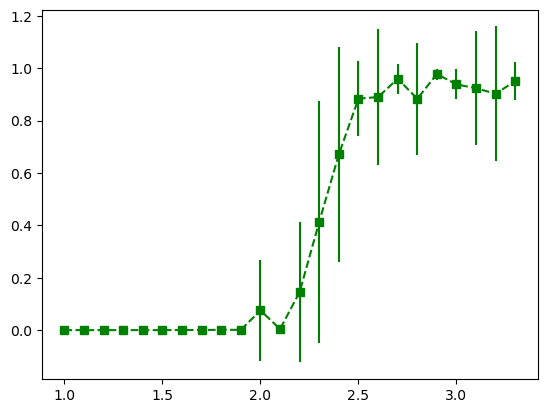

In [122]:
plt.errorbar(temp_test[3], y[:,:,0].mean(axis=0), y[:,:,0].std(axis=0), fmt='s--g')


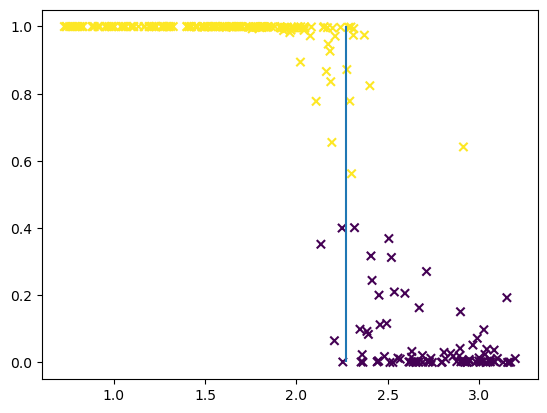

In [69]:
out = clf.predict_proba(data_val)
plt.scatter(temps[a:], out[:,1], marker='x', c=clf.predict(data_val) )
plt.vlines(T_CRIT, 0, 1)